## LOADING DATA

In [1]:
import xarray as xr # typically alias with xr

import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs # Cartopy map projections
from matplotlib import cm # Colormap from matplotlib
import urllib.request # module for downloading data from URLs


# Added after recorded - let's download our data!
filename = 'air.mon.mean.nc'
url = 'http://rfd.atmos.uiuc.edu/Atms517/week7/'+filename

# Downloads what is at the address passed in as 'url' and saves as 'filename'
urllib.request.urlretrieve(url, filename)

# Added after recording this lesson
filename = 'GLDAS_NOAH025_M_EP.A202010.021.nc4'
url = 'http://rfd.atmos.uiuc.edu/Atms517/week7/'+filename

# Downloads what is at the address passed in as 'url' and saves as 'filename'
urllib.request.urlretrieve(url, filename)

('GLDAS_NOAH025_M_EP.A202010.021.nc4',
 <http.client.HTTPMessage at 0x1b6a91b3688>)

In [2]:
# Example data array: of air temperatures
da = xr.open_dataarray('air.mon.mean.nc')
print(da)

<xarray.DataArray 'air' (time: 873, lat: 73, lon: 144)>
[9176976 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-09-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]


In [3]:
# Example dataset: of land-surface characteristics - cool! 
ds = xr.open_dataset('GLDAS_NOAH025_M_EP.A202010.021.nc4')
print(ds)

<xarray.Dataset>
Dimensions:                (bnds: 2, lat: 600, lon: 1440, time: 1)
Coordinates:
  * lat                    (lat) float32 -59.88 -59.62 -59.38 ... 89.62 89.88
  * lon                    (lon) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time                   (time) datetime64[ns] 2020-10-01
Dimensions without coordinates: bnds
Data variables: (12/37)
    time_bnds              (time, bnds) datetime64[ns] ...
    Swnet_tavg             (time, lat, lon) float32 ...
    Lwnet_tavg             (time, lat, lon) float32 ...
    Qle_tavg               (time, lat, lon) float32 ...
    Qh_tavg                (time, lat, lon) float32 ...
    Qg_tavg                (time, lat, lon) float32 ...
    ...                     ...
    Rainf_f_tavg           (time, lat, lon) float32 ...
    Tair_f_inst            (time, lat, lon) float32 ...
    Qair_f_inst            (time, lat, lon) float32 ...
    Psurf_f_inst           (time, lat, lon) float32 ...
    SWdown_f_tavg          (tim

## DATA STRUCTURES IN XARRAY: OVERVIEW
- **Xarray**: designed specifically to handle multi-D arrays (especially from Netcdf files), including *labels*, and efficiently do label-based operations on the arrays
<br><br>
- **Should I use Pandas or Xarray?**:  
  - if your data has 2+ dimensions, order of dimensions doesn't matter?: *Xarray*
    - 2+ dimensioned spatial data: *Xarray*
  - data unstructured or 1D?  *Pandas*
  - data easily described by rows and columns? *Pandas*
<br><br>
- Like in Pandas, label indices are not limited to being integers
  - Often use coordinates for spatial data as labels - value of latitude, longitude, etc.
<br><br>
- **Two data structures**: 
  - DataArray
  - DataSet
<br><br>
- The data structures have special attributes and methods!
<br><br>
- We'll often read from files into data structures, but you can also create from scratch 

## XARRAY DATA ARRAY: OVERVIEW

**Definition**: N-dimensional array that has labelled dimensions and coordinates 
- single variable 

### (1) SYNTAX
- **create from scratch**: xr.DataArray(data,coords,dims)
<br><br>
- **read in from file**:  xr.open_dataarray('filename')

### (2) CHARACTERISTICS 
da = xr.open_dataarray(file)
<br><br>
*Examples*
- da.dims = dimensions of var
- da.values = values of var
- da.attrs = attributes of var
- da.coords = coordinates of var

In [4]:
da.dims # 3 dimensions: time, lat, lon

('time', 'lat', 'lon')

In [5]:
da.attrs # attributes associated with the variable

{'long_name': 'Monthly Mean Air Temperature at sigma level 0.995',
 'valid_range': array([-2000.,  2000.], dtype=float32),
 'units': 'degC',
 'precision': 1,
 'var_desc': 'Air Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'parent_stat': 'Individual Obs',
 'dataset': 'NCEP Reanalysis Derived Products',
 'actual_range': array([-73.78001,  42.14595], dtype=float32)}

In [6]:
da.coords # some info about the coordinates of the dimensions of the variable

Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-09-01

## XARRAY DATA SET: OVERVIEW

**Definition**: dictionary-like set of multiple, N-dimensional arrays with labelled coordinates and dimensions + any number of shared dimensions 
- multiple variables

### (1) SYNTAX
- *create from scratch*: xr.dataset(data,coords,dims)
<br><br>
- *read in from file*:  xr.open_dataset('filename')

### (2) CHARACTERISTICS 
ds = xr.open_dataset(file)
<br><br>
*Examples*
- ds.data_vars: list of variables in dataset
- ds.coords: list of coordinates 
- ds.attrs: list of attributes 
- ds['var_name'] to access characteristics of single variable

In [7]:
# Albedo is the fraction of incoming solar radiation that will be reflected by the surface
# Here, expressed as a percentage 
# Albedo is SUPER important to Earth's climate!
# High albedo = v. reflective surface, so less absorption of incoming solar radiation

In [8]:
ds['Albedo_inst'].dims 

('time', 'lat', 'lon')

In [9]:
ds['Albedo_inst'].attrs # attributes associated with the variable

{'units': '%',
 'standard_name': 'surface_albedo',
 'long_name': 'Albedo',
 'cell_methods': 'time: mean',
 'vmin': 4.999999,
 'vmax': 82.283226}

In [10]:
ds['Albedo_inst'].coords # some info about the coordinates of the variable that, collectively, label each element in the array

Coordinates:
  * lat      (lat) float32 -59.88 -59.62 -59.38 -59.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time     (time) datetime64[ns] 2020-10-01

## BASIC PLOTTING IN XARRAY
- recall Xarray plotting calls are wrappers to Matplotlib functions
- 'plot' function creates plot that makes most sense given dimensions of your data, or you can specify
-  we can pass arguments to customize our plot!

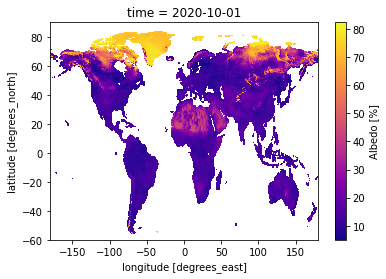

In [11]:
cmap = cm.get_cmap(name='plasma')

                    # stay tuned
p = ds['Albedo_inst'].isel(time=0).plot(cmap=cmap)

   - we can even plot maps using Cartopy within this structure
   <br><br>
   - **Cartopy note**:  good practice to specify both transform and projection for our map
     - *projection*: projection of the plot itself
     - *transform*:  coordinate system data defined in
     - if no *transform* argument given, assumes projection = transform

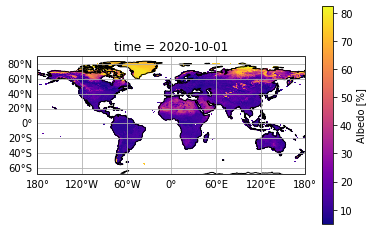

In [12]:
cmap = cm.get_cmap(name='plasma')
proj = ccrs.PlateCarree()
trans = ccrs.PlateCarree()

# Projected onto a map!
p = ds['Albedo_inst'].isel(time=0).plot(cmap=cmap,subplot_kws=dict(projection=proj),transform=trans)

p.axes.coastlines()
gl = p.axes.gridlines(draw_labels=True)
gl.right_labels= False
gl.top_labels=False